# Final Project: Introduction To Machine Learning

## Importing Necessary Libraries

In [494]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB


## Extract The Data

In [495]:
file_path = 'hotel_bookings.csv'
hotel_data = pd.read_csv(file_path)
data = hotel_data.copy()

## Exploratory Data Analysis

In [496]:
# Basic information about the dataset
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [497]:
# Distribution of numerical features
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


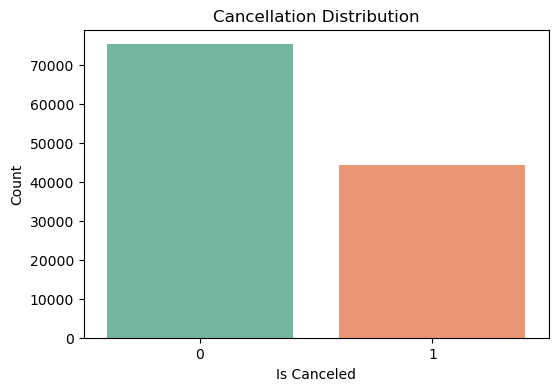

In [498]:
# Distribution of 'is_canceled' (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=hotel_data, palette="Set2")
plt.title('Cancellation Distribution')
plt.xlabel('Is Canceled')
plt.ylabel('Count')
plt.show()

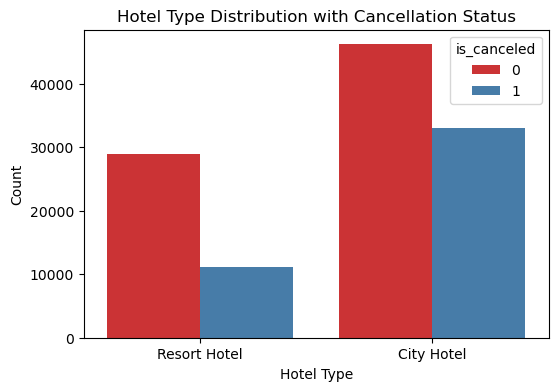

In [499]:
# Distribution of hotel types with respect to cancellation
plt.figure(figsize=(6, 4))
sns.countplot(x='hotel', hue='is_canceled', data=hotel_data, palette="Set1")
plt.title('Hotel Type Distribution with Cancellation Status')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

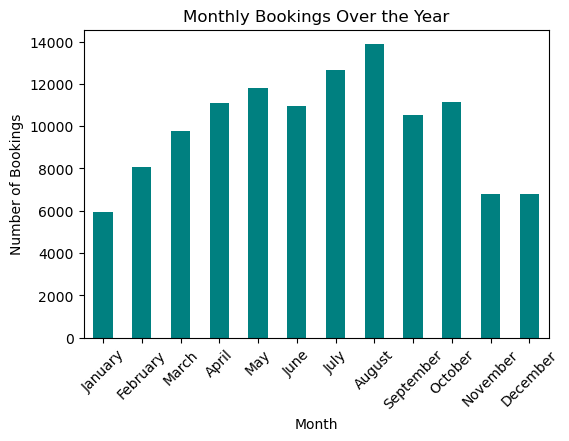

In [500]:
# Monthly bookings over the year
monthly_bookings = hotel_data.groupby(['arrival_date_month'])['hotel'].count().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.figure(figsize=(6,4))
monthly_bookings.plot(kind='bar', color='teal')
plt.title('Monthly Bookings Over the Year')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

In [501]:
#checking for missing values
print(data.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [502]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

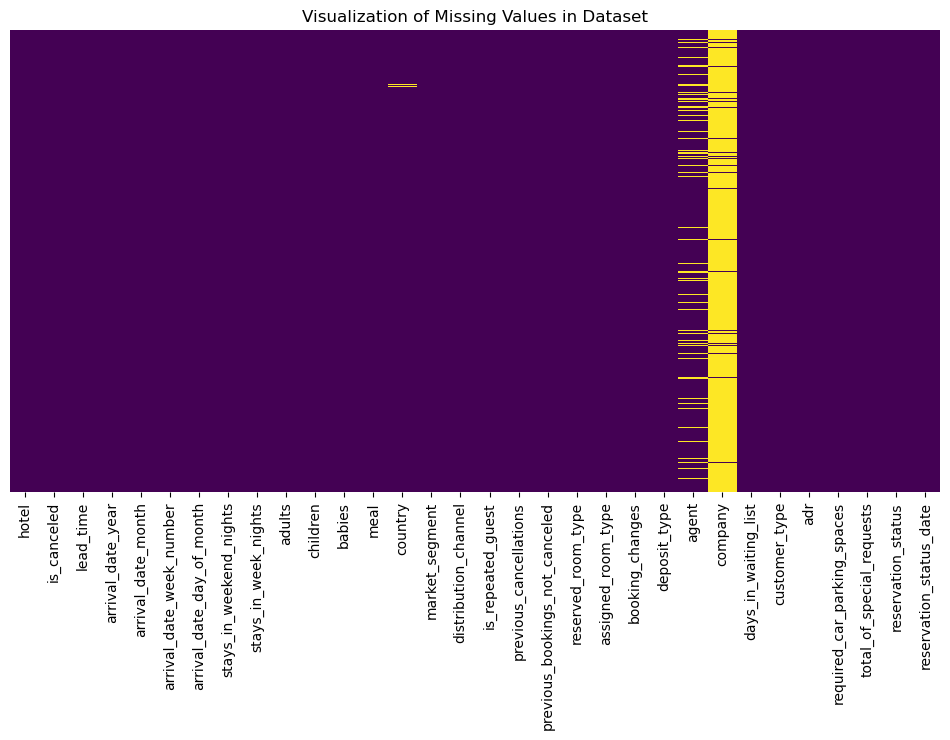

In [503]:
plt.figure(figsize=(12,6))
sns.heatmap(hotel_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualization of Missing Values in Dataset')
plt.show()

## Data Cleaning: Removing Missing Values

* Since a large number of values are missing in the company column and agent column, we can drop it  
* Since a small number of values are missing in the 'children' and 'country' column, we can drop the rows with missing values
* After observing the data, we can see that the 'meal' column has a lot of values as 'Undefined', so we can drop it
* The 'arrival_date_week_number' column is revealed by the 'arrival_date_year' and 'arrival_date_month' columns. Hence, we can drop it

In [504]:
data.drop(['company', 'agent', 'meal', 'arrival_date_week_number'], axis=1, inplace=True)
data.dropna(subset=['children', 'country'], inplace=True)

*An essential observation that the paper missed was that the 'reservation_status' column reveals whether the booking was cancelled or not. Hence, this data would not available when a prediciton is being made. Hence, this is leaking data. We will drop 'reservation_status' column and 'reservation_status_date' column*

In [505]:
data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [506]:
data.drop([ 'reservation_status', 'reservation_status_date' ], axis=1, inplace=True)

## Data Preprocessing: Encoding the Necessary Features

* Standardized all the numberical features so the values are on a similar scale and because I am going to implement PCA later
* Frequency encoding for 'country' since it has too many values for one hot encoding. it'll increase dimensionality drastically
* use one-hot encoding for features which have relatively fewer categories 

In [507]:
og_x = data.drop('is_canceled', axis=1)
y = data['is_canceled']
x = og_x.copy()

In [508]:
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

In [509]:
frequency_encoding = x['country'].value_counts(normalize=True)
x['country'] = x['country'].map(frequency_encoding)

In [510]:
# Define columns for one-hot encoding which have relatively fewer categories 
#  and scaling 
onehot_columns = ['arrival_date_year', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type']
scale_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
                 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
                 'required_car_parking_spaces', 'total_of_special_requests']

In [511]:
# One-hot encoding for other categorical features
x = pd.get_dummies(x, drop_first=True)
x.corr()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
lead_time,1.000000,0.039924,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,0.094284,-0.125091,...,-0.020997,-0.019047,-0.028134,-0.002830,-0.004002,0.379741,0.016512,-0.031544,-0.173038,0.158616
arrival_date_year,0.039924,1.000000,-0.000590,0.021669,0.031754,0.029146,0.054492,-0.013183,-0.194635,0.010128,...,0.001758,0.000156,0.008849,-0.004746,0.004883,-0.066143,-0.000819,-0.011336,0.228955,-0.164202
arrival_date_day_of_month,0.002320,-0.000590,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,0.001364,-0.006340,...,0.003075,0.002593,-0.006245,0.000396,-0.002243,-0.008720,0.032207,-0.001255,-0.000601,0.006254
stays_in_weekend_nights,0.083984,0.021669,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.151445,-0.087836,...,0.009145,-0.001792,0.002938,-0.002704,-0.003824,-0.115020,0.001721,-0.007147,0.020424,-0.066075
stays_in_week_nights,0.164783,0.031754,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.132403,-0.097994,...,0.011131,-0.009487,0.002735,-0.002293,-0.005401,-0.081020,0.006798,-0.015842,0.007981,-0.065443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
deposit_type_Non Refund,0.379741,-0.066143,-0.008720,-0.115020,-0.081020,-0.030468,-0.096992,-0.030505,0.424460,-0.058641,...,-0.028261,-0.020042,-0.018126,-0.001084,-0.001533,1.000000,-0.013805,-0.025940,0.116396,-0.121943
deposit_type_Refundable,0.016512,-0.000819,0.032207,0.001721,0.006798,0.003129,-0.006787,-0.003015,-0.004792,-0.001536,...,-0.002859,-0.002027,-0.001791,-0.000107,-0.000151,-0.013805,1.000000,0.023844,-0.053447,0.054677
customer_type_Group,-0.031544,-0.011336,-0.001255,-0.007147,-0.015842,0.060341,-0.006527,0.000587,0.005896,0.098747,...,-0.003789,0.007319,0.004184,-0.000201,-0.000285,-0.025940,0.023844,1.000000,-0.120215,-0.035883
customer_type_Transient,-0.173038,0.228955,-0.000601,0.020424,0.007981,0.092852,0.096562,0.021591,-0.058614,0.023777,...,0.031809,-0.007722,0.003914,0.001674,0.002368,0.116396,-0.053447,-0.120215,1.000000,-0.895497


* To compare the difference in results, I will use another encoding scheme on the same dataset. I will not scale the columns and I will simply use label encoding for the textual features.

In [512]:
# Apply Label Encoding to Categorical Features
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
alt_x = data.drop('is_canceled', axis=1)
for column in alt_x.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    alt_x[column] = label_encoders[column].fit_transform(alt_x[column])


alt_x

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,342,2015,5,1,0,0,2,0.0,0,...,0,2,2,3,0,0,2,0.00,0,0
1,1,737,2015,5,1,0,0,2,0.0,0,...,0,2,2,4,0,0,2,0.00,0,0
2,1,7,2015,5,1,0,1,1,0.0,0,...,0,0,2,0,0,0,2,75.00,0,0
3,1,13,2015,5,1,0,1,1,0.0,0,...,0,0,0,0,0,0,2,75.00,0,0
4,1,14,2015,5,1,0,2,2,0.0,0,...,0,0,0,0,0,0,2,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,1,30,2,5,2,0.0,0,...,0,0,0,0,0,0,2,96.14,0,0
119386,0,102,2017,1,31,2,5,3,0.0,0,...,0,4,4,0,0,0,2,225.43,0,2
119387,0,34,2017,1,31,2,5,2,0.0,0,...,0,3,3,0,0,0,2,157.71,0,4
119388,0,109,2017,1,31,2,5,2,0.0,0,...,0,0,0,0,0,0,2,104.40,0,0


* For Further comparison, I will create another section with balanced data. I will make sure that both the predicted values for is_cancelled have the equal entries

In [513]:
x.corr()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
lead_time,1.000000,0.039924,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,0.094284,-0.125091,...,-0.020997,-0.019047,-0.028134,-0.002830,-0.004002,0.379741,0.016512,-0.031544,-0.173038,0.158616
arrival_date_year,0.039924,1.000000,-0.000590,0.021669,0.031754,0.029146,0.054492,-0.013183,-0.194635,0.010128,...,0.001758,0.000156,0.008849,-0.004746,0.004883,-0.066143,-0.000819,-0.011336,0.228955,-0.164202
arrival_date_day_of_month,0.002320,-0.000590,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,0.001364,-0.006340,...,0.003075,0.002593,-0.006245,0.000396,-0.002243,-0.008720,0.032207,-0.001255,-0.000601,0.006254
stays_in_weekend_nights,0.083984,0.021669,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.151445,-0.087836,...,0.009145,-0.001792,0.002938,-0.002704,-0.003824,-0.115020,0.001721,-0.007147,0.020424,-0.066075
stays_in_week_nights,0.164783,0.031754,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.132403,-0.097994,...,0.011131,-0.009487,0.002735,-0.002293,-0.005401,-0.081020,0.006798,-0.015842,0.007981,-0.065443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
deposit_type_Non Refund,0.379741,-0.066143,-0.008720,-0.115020,-0.081020,-0.030468,-0.096992,-0.030505,0.424460,-0.058641,...,-0.028261,-0.020042,-0.018126,-0.001084,-0.001533,1.000000,-0.013805,-0.025940,0.116396,-0.121943
deposit_type_Refundable,0.016512,-0.000819,0.032207,0.001721,0.006798,0.003129,-0.006787,-0.003015,-0.004792,-0.001536,...,-0.002859,-0.002027,-0.001791,-0.000107,-0.000151,-0.013805,1.000000,0.023844,-0.053447,0.054677
customer_type_Group,-0.031544,-0.011336,-0.001255,-0.007147,-0.015842,0.060341,-0.006527,0.000587,0.005896,0.098747,...,-0.003789,0.007319,0.004184,-0.000201,-0.000285,-0.025940,0.023844,1.000000,-0.120215,-0.035883
customer_type_Transient,-0.173038,0.228955,-0.000601,0.020424,0.007981,0.092852,0.096562,0.021591,-0.058614,0.023777,...,0.031809,-0.007722,0.003914,0.001674,0.002368,0.116396,-0.053447,-0.120215,1.000000,-0.895497


## Feature Engineering: Using Principle Component Analysis

In [514]:
# Perform PCA
xcopy = x.copy()
pca = PCA()
pca.fit(xcopy)    
# Calculate the cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
cumulative_explained_variance[:20] 

array([0.10463469, 0.19409777, 0.26937476, 0.33121945, 0.38957053,
       0.44651251, 0.50046992, 0.55258721, 0.60277983, 0.64992675,
       0.69452874, 0.73620301, 0.77507542, 0.80650563, 0.83556826,
       0.861707  , 0.87981745, 0.89560019, 0.90863494, 0.91950299])

*Here, I realise that the first 20 principle components account for 91% of the cumulative variance. Hence, I will use only these to reduce the dimensionality. This will make our algorithm more efficient. Additionally, this will be another comparison metric against our original data.*

Let us visualise this

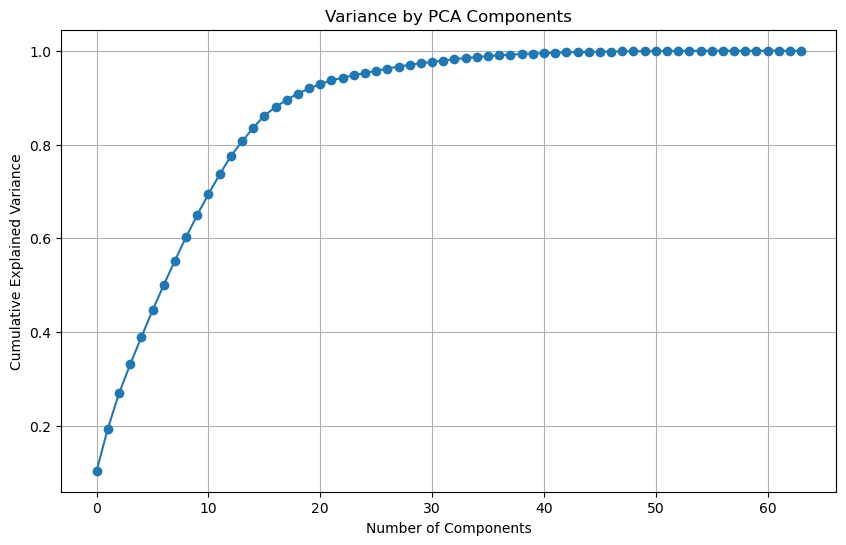

In [515]:
# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance by PCA Components')
plt.grid(True)

# Show the plot
plt.show()

In [516]:
pca = PCA(n_components=20)
pca.fit(xcopy)
pca_x = pca.transform(xcopy)

## Data Splitting for the various variations

In [517]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.3, random_state=42)

In [518]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(pca_x, y, test_size=0.3, random_state=42)

In [519]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(alt_x, y, test_size=0.3, random_state=42)

In [520]:
#

## CLASSIFIERS

In [521]:
dt_classifier = DecisionTreeClassifier()
log_reg = LogisticRegression()
rf_classifier = RandomForestClassifier()
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
nb_classifier = GaussianNB()
dt_classifier2 = DecisionTreeClassifier()
log_reg2 = LogisticRegression()
rf_classifier2 = RandomForestClassifier()
bagging_classifier2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
nb_classifier2 = GaussianNB()
dt_classifier3 = DecisionTreeClassifier()
log_reg3 = LogisticRegression()
rf_classifier3 = RandomForestClassifier()
bagging_classifier3 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
nb_classifier3 = GaussianNB()

Fit the data

In [522]:
# Fit the classifiers with the original data
dt_classifier.fit(xtrain1, ytrain1)
log_reg.fit(xtrain1, ytrain1)
rf_classifier.fit(xtrain1, ytrain1)
bagging_classifier.fit(xtrain1, ytrain1)
nb_classifier.fit(xtrain1, ytrain1)

c:\Users\Aaryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aaryan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GaussianNB()

In [523]:
# Fit the classifiers with the principal components
dt_classifier2.fit(xtrain2, ytrain2)
log_reg2.fit(xtrain2, ytrain2)
rf_classifier2.fit(xtrain2, ytrain2)
bagging_classifier2.fit(xtrain2, ytrain2)
nb_classifier2.fit(xtrain2, ytrain1)

c:\Users\Aaryan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GaussianNB()

In [524]:
dt_classifier3.fit(xtrain3, ytrain3)
log_reg3.fit(xtrain3, ytrain3)
rf_classifier3.fit(xtrain3, ytrain3)
bagging_classifier3.fit(xtrain3, ytrain3)
nb_classifier3.fit(xtrain3, ytrain3)

c:\Users\Aaryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aaryan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GaussianNB()

In [525]:
ypred_dt = dt_classifier.predict(xtest1)
ypred_log = log_reg.predict(xtest1)
ypred_rf = rf_classifier.predict(xtest1)
ypred_bag = bagging_classifier.predict(xtest1)
ypred_nb = nb_classifier.predict(xtest1)

In [526]:
ypred_dt2 = dt_classifier2.predict(xtest2)
ypred_log2 = log_reg2.predict(xtest2)
ypred_rf2 = rf_classifier2.predict(xtest2)
ypred_bag2 = bagging_classifier2.predict(xtest2)
ypred_nb2 = nb_classifier2.predict(xtest2)

In [527]:
ypred_dt3 = dt_classifier3.predict(xtest3)
ypred_log3 = log_reg3.predict(xtest3)
ypred_rf3 = rf_classifier3.predict(xtest3)
ypred_bag3 = bagging_classifier3.predict(xtest3)
ypred_nb3 = nb_classifier3.predict(xtest3)

In [528]:
acc_dt = accuracy_score(ypred_dt, ytest1) 
acc_log = accuracy_score(ytest1, ypred_log)
acc_rf = accuracy_score(ytest1, ypred_rf)
acc_bag = accuracy_score(ytest1, ypred_bag)
acc_nb = accuracy_score(ytest1, ypred_nb)

In [529]:
acc_dt2 = accuracy_score(ytest2, ypred_dt2) 
acc_log2 = accuracy_score(ytest2, ypred_log2)
acc_rf2 = accuracy_score(ytest2, ypred_rf2)
acc_bag2 = accuracy_score(ytest2, ypred_bag2)
acc_nb2 = accuracy_score(ytest2, ypred_nb2)

In [530]:
acc_dt3 = accuracy_score(ytest3, ypred_dt3)
acc_log3 = accuracy_score(ytest3, ypred_log3)
acc_rf3 = accuracy_score(ytest3, ypred_rf3)
acc_bag3 = accuracy_score(ytest3, ypred_bag3)
acc_nb3 = accuracy_score(ytest3, ypred_nb3)

## Conclusions

In [531]:
print('Accuracy of Decision Tree Classifier: ', (acc_dt))
print('Accuracy of Logistic Regression: ', (acc_log))
print('Accuracy of Random Forest Classifier: ', (acc_rf))
print('Accuracy of Bagging Classifier: ', (acc_bag))
print('Accuracy of Naive Bayes Classifier: ', (acc_nb))


Accuracy of Decision Tree Classifier:  0.839753294084665
Accuracy of Logistic Regression:  0.8077656293804317
Accuracy of Random Forest Classifier:  0.8839360807401178
Accuracy of Bagging Classifier:  0.8702831511073731
Accuracy of Naive Bayes Classifier:  0.58107653490328


In [532]:
print('Accuracy of Decision Tree Classifier with pca :  ', (acc_dt2))
print('Accuracy of Logistic Regression with pca :  ', (acc_log2))
print('Accuracy of Random Forest Classifier with pca :  ', (acc_rf2))
print('Accuracy of Bagging Classifier with pca :  ', (acc_bag2))
print('Accuracy of Naive Bayes Classifier with pca :  ', (acc_nb2))

Accuracy of Decision Tree Classifier with pca :   0.8017661900756938
Accuracy of Logistic Regression with pca :   0.786963835155593
Accuracy of Random Forest Classifier with pca :   0.8558732828707597
Accuracy of Bagging Classifier with pca :   0.8416035884496776
Accuracy of Naive Bayes Classifier with pca :   0.7126436781609196


In [533]:
print('Accuracy of Decision Tree Classifier with label encoding :  ', (acc_dt3))
print('Accuracy of Logistic Regression with label encoding :  ', (acc_log3))
print('Accuracy of Random Forest Classifier with label encoding :  ', (acc_rf3))
print('Accuracy of Bagging Classifier with label encoding :  ', (acc_bag3))
print('Accuracy of Naive Bayes Classifier with label encoding :  ', (acc_nb3))

Accuracy of Decision Tree Classifier with label encoding :   0.8402859545836837
Accuracy of Logistic Regression with label encoding :   0.7421082141855901
Accuracy of Random Forest Classifier with label encoding :   0.8827586206896552
Accuracy of Bagging Classifier with label encoding :   0.867143257639473
Accuracy of Naive Bayes Classifier with label encoding :   0.5725259321558733


In [534]:
print('Average Accuracy without pca :  ', (acc_dt+acc_log+acc_rf+acc_bag+acc_nb)/5)
print('Average Accuracy with pca :  ', (acc_dt2+acc_log2+acc_rf2+acc_bag2+acc_nb2)/5)
print('Average Accuracy with label encoding :  ', (acc_dt3+acc_log3+acc_rf3+acc_bag3+acc_nb3)/5)

Average Accuracy without pca :   0.7965629380431734
Average Accuracy with pca :   0.7997701149425287
Average Accuracy with label encoding :   0.780964395850855


In [535]:
accuracies_original = [acc_dt, acc_log, acc_rf, acc_bag, acc_nb]
accuracies_pca = [acc_dt2, acc_log2, acc_rf2, acc_bag2, acc_nb2]
accuracies_label = [acc_dt3, acc_log3, acc_rf3, acc_bag3, acc_nb3]

# Model names
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Bagging', 'Naive Bayes']

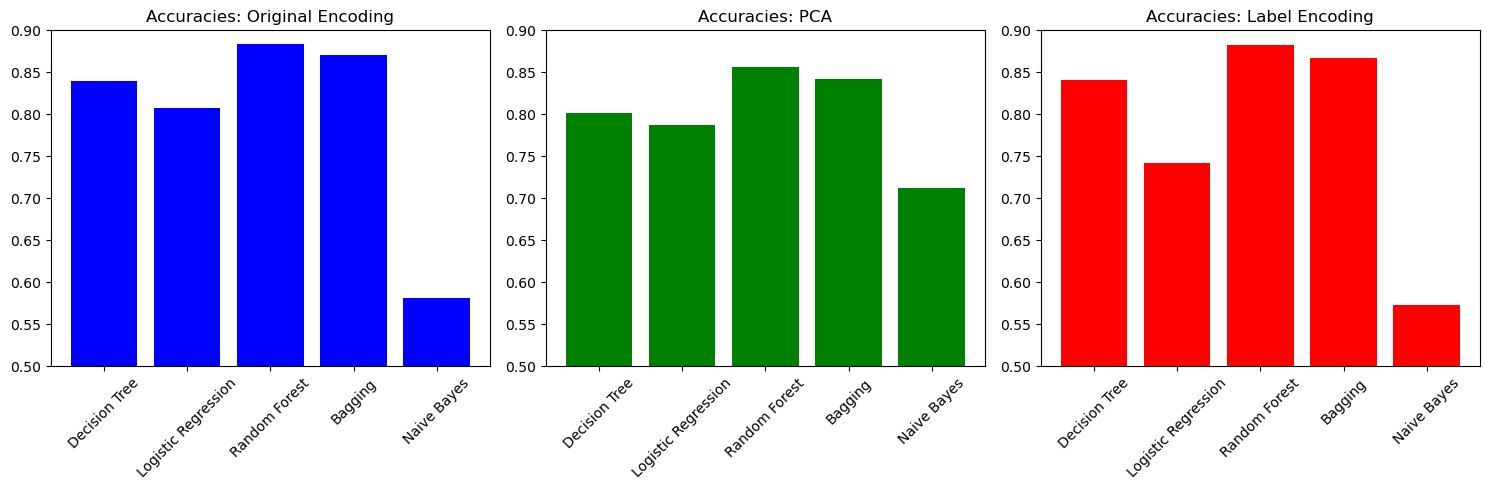

In [536]:
# Plotting accuracies for each encoding scheme
plt.figure(figsize=(15, 5))

# Original encoding accuracies
plt.subplot(1, 3, 1)
plt.bar(models, accuracies_original, color='blue')
plt.title('Accuracies: Original Encoding')
plt.ylim(0.5, 0.9)
plt.xticks(rotation=45)

# PCA encoding accuracies
plt.subplot(1, 3, 2)
plt.bar(models, accuracies_pca, color='green')
plt.title('Accuracies: PCA')
plt.ylim(0.5, 0.9)
plt.xticks(rotation=45)

# Label encoding accuracies
plt.subplot(1, 3, 3)
plt.bar(models, accuracies_label, color='red')
plt.title('Accuracies: Label Encoding')
plt.ylim(0.5, 0.9)
plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

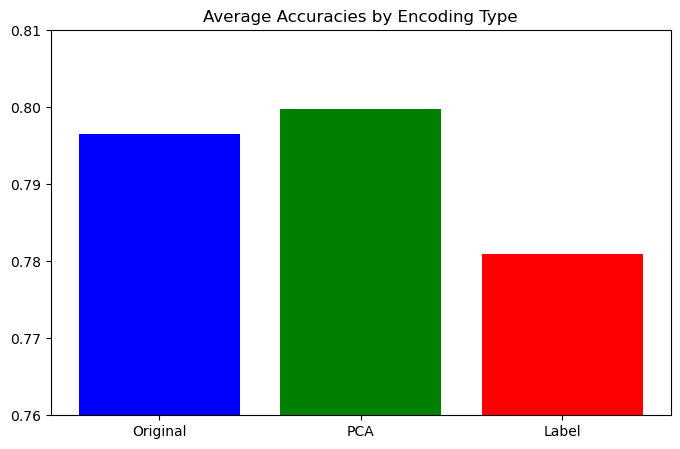

In [537]:
# Plotting average accuracies
# Average accuracies
avg_acc_original = sum(accuracies_original) / len(accuracies_original)
avg_acc_pca = sum(accuracies_pca) / len(accuracies_pca)
avg_acc_label = sum(accuracies_label) / len(accuracies_label)
average_accuracies = [avg_acc_original, avg_acc_pca, avg_acc_label]
encoding_types = ['Original', 'PCA', 'Label']

plt.figure(figsize=(8, 5))
plt.bar(encoding_types, average_accuracies, color=['blue', 'green', 'red'])
plt.title('Average Accuracies by Encoding Type')
plt.ylim(0.76, 0.81)
plt.show()

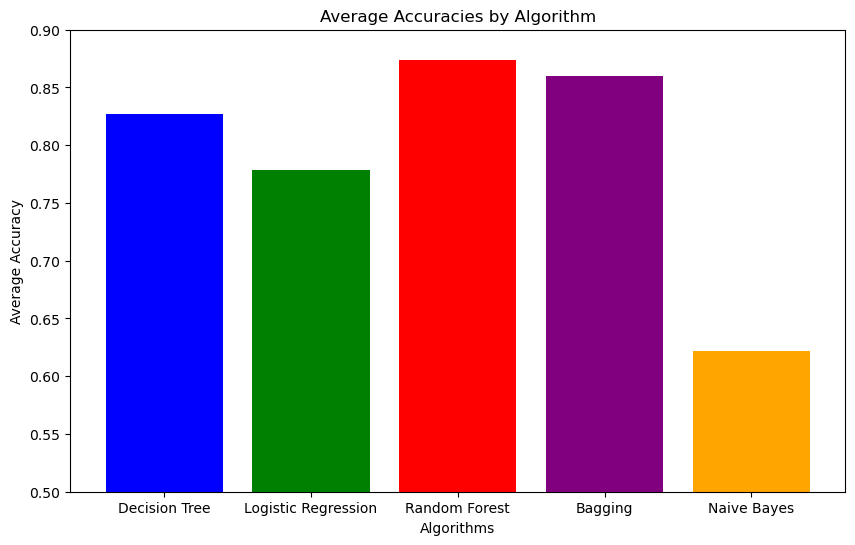

In [538]:
# Calculate average accuracies by algorithm
avg_acc_dt = (acc_dt + acc_dt2 + acc_dt3) / 3
avg_acc_log = (acc_log + acc_log2 + acc_log3) / 3
avg_acc_rf = (acc_rf + acc_rf2 + acc_rf3) / 3
avg_acc_bag = (acc_bag + acc_bag2 + acc_bag3) / 3
avg_acc_nb = (acc_nb + acc_nb2 + acc_nb3) / 3

average_accuracies = [avg_acc_dt, avg_acc_log, avg_acc_rf, avg_acc_bag, avg_acc_nb]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, average_accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracies by Algorithm')
plt.ylim(0.5, 0.9)  # Adjust this based on your actual accuracy values

# Show the plot
plt.show()

### Cross validation using only numpy


In [539]:
def accuracy_score(a,b):  #find the accuracy score by calculating the mean of an array c storing whether the predicted value and actual value of Y match or not
    c = np.mean(a==b)
    return c

In [540]:
X = x.copy()
Y = y.copy()
n = len(y)

p = np.random.permutation(n) #shuffle the data

Y = Y.iloc[p].reset_index(drop=True)
X = X.iloc[p].reset_index(drop=True)

k = 10 #number of folds
f = n//k #size of each fold
criteria = ['gini', 'entropy', 'log_loss'] #criteria to be used

a = np.zeros([3,10]) #array to store accuracy scores for each fold and each criterion

for j in range(3) : #for each criterion

    for i in range(k):    #for each fold

        X_test = X.iloc[i*f:(i+1)*f] #testing data for each iteration
        Y_test = Y.iloc[i*f:(i+1)*f]
        
        X_train = X.drop(X_test.index) #training data for each iteration
        Y_train = Y.drop(Y_test.index)
        
        clf = DecisionTreeClassifier(criterion=criteria[j])
        clf.fit(X_train, Y_train) #fitting the model for the given criterion and given fold

        Y_pred = clf.predict(X_test) #testing the model on the test data 

        a[j][i] = accuracy_score(Y_test, Y_pred) #calculating accuracy
        #n = clf.score(X_test, Y_test) #calculating accuracy

In [541]:
print("average accuracy score for gini criterion is", np.mean(a[0]))
print("average accuracy score for entropy criterion is", np.mean(a[1]))
print("average accuracy score for log_loss criterion is", np.mean(a[2]))

average accuracy score for gini criterion is 0.8510051307931702
average accuracy score for entropy criterion is 0.8521574564723695
average accuracy score for log_loss criterion is 0.8523593237446379


### Manually implementing Bagging and Random Forests using only Numpy to see how it compares to the SKlearn models

In [542]:
xt5 = xtrain1.copy()
yt5 = ytrain1.copy()
train_data = pd.concat([xt5,yt5],axis = 1)

In [543]:
def bag(data, n_samples=100):
    samples = []
    n = len(data)
    for _ in range(n_samples):
        indices = np.random.choice(n, size=n, replace=True)
        sample = data.iloc[indices, :]
        samples.append(sample)
    return samples


In [544]:
samples = bag(train_data)

In [545]:
def create(samples):
    trees = []
    valdata = []
    testdata = []

    for sample in samples:
        x = sample.iloc[:, :-1]
        y = sample.iloc[:, -1]

        # Randomly selecting features
        n_features = len(x.columns)
        n_selected_features = np.random.randint(n_features // 2, n_features)
        selected_features = np.random.choice(x.columns, size=n_selected_features, replace=False)
        x = x[selected_features]

        # Creating decision tree
        tree = DecisionTreeClassifier(criterion='gini')
        tree.fit(x, y)
        trees.append((tree, selected_features))

        # Recording the selected features for validation and test data
        #valdata.append(X_validation[selected_features])
        testdata.append(xtest1[selected_features])

    return trees, valdata, testdata

trees, valdata, testdata = create(samples)

In [546]:
# Function to make predictions using the forest
def predict_forest(trees, data):
    predictions = []
    for tree, features in trees:
        preds = tree.predict(data[features])
        predictions.append(preds)
    predictions = np.array(predictions)
    return np.round(predictions.mean(axis=0))

# # Evaluating on validation data
# y_pred_validation = predict_forest(trees, X_validation)
# accuracy_validation = accuracy_score(y_validation, y_pred_validation)
# print("Validation Accuracy:", accuracy_validation)

# Evaluating on test data
y_pred_test = predict_forest(trees, xtest1)
accuracy_test = accuracy_score(ytest1, y_pred_test)
print("Test Accuracy:", accuracy_test)


Test Accuracy: 0.8818615082702551


### got as much accuracy in the manually implemented model!